<a href="https://colab.research.google.com/github/annahunn20/Infosys_springboard-6.0-assignments/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [204]:
df = pd.read_csv('housing.csv')

In [205]:
print("First 5 rows of the dataset:")
print(df.head())
print(f"Dataset shape: {df.shape}")

First 5 rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Dataset shape: (20640, 10)


In [206]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [207]:
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [208]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [209]:
categorical_cols = ['ocean_proximity']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

In [210]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X[categorical_cols]))
OH_cols.index = X.index
OH_cols.columns = OH_encoder.get_feature_names_out()

In [211]:
X_numeric = X.drop(categorical_cols, axis=1)
X_processed = pd.concat([X_numeric, OH_cols], axis=1)

In [212]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

In [213]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"Retained variance: {pca.explained_variance_ratio_.sum():.2f} with {pca.n_components_} components")

Retained variance: 0.98 with 9 components


In [214]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=0.8, test_size=0.2, random_state=0)

In [215]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [216]:
y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Percentage Error: {mape:.2%}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Percentage Error: 30.23%
R² Score: 0.5892


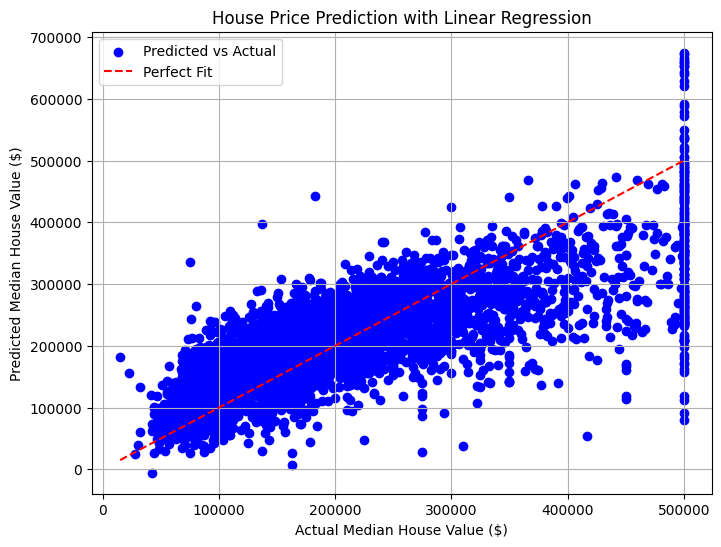

In [217]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Median House Value ($)')
plt.ylabel('Predicted Median House Value ($)')
plt.title('House Price Prediction with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [218]:
def get_teacher_input():
    return {
        "longitude": float(input("Longitude: ")),
        "latitude": float(input("Latitude: ")),
        "housing_median_age": float(input("Median age: ")),
        "total_rooms": float(input("Total rooms: ")),
        "total_bedrooms": float(input("Total bedrooms: ")),
        "population": float(input("Population: ")),
        "households": float(input("Households: ")),
        "median_income": float(input("Median income: ")),
        "ocean_proximity": input(f"Ocean proximity {list(OH_encoder.categories_[0])}: ")
    }

In [ ]:
if input("Test with your own input? (y/n): ").lower() == "y":
    teacher_input = get_teacher_input()
    print(f"Predicted House Value: ${predict_custom_input(teacher_input):,.2f}")